D'acord, l'objectiu és poder determinar quin dels dos equips guanyarà la partida

In [48]:
# Importar llibreries necessàries
import pandas as pd
import numpy as np
import sklearn as sk

In [49]:
DataSet = pd.read_csv("../LOL - Dataset/games.csv")

DataSet.head(10)

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
5,3287435705,1501667992132,2059,9,1,2,2,1,1,2,...,6,0,0,3,0,119,134,154,63,31
6,3314215542,1503430065724,1993,9,1,1,2,1,1,1,...,2,0,0,0,0,75,42,31,40,429
7,3329224025,1504472363684,1334,9,1,1,1,0,0,2,...,0,0,0,2,0,157,38,122,40,238
8,3318040883,1503686577549,1387,9,2,2,2,2,0,2,...,8,1,0,2,1,28,51,53,157,40
9,3327786881,1504385918871,2681,9,2,2,2,2,2,2,...,8,3,1,2,0,64,141,84,67,53


In [88]:
DataSet_champions = pd.read_json("../LOL - Dataset/champion_info.json")

DataSet_champions.head(10)

,type,version,data
1,champion,7.17.2,"{'title': 'the Dark Child', 'id': 1, 'key': 'A..."
2,champion,7.17.2,"{'title': 'the Berserker', 'id': 2, 'key': 'Ol..."
3,champion,7.17.2,"{'title': 'the Colossus', 'id': 3, 'key': 'Gal..."
4,champion,7.17.2,"{'title': 'the Card Master', 'id': 4, 'key': '..."
5,champion,7.17.2,"{'title': 'the Seneschal of Demacia', 'id': 5,..."
6,champion,7.17.2,"{'title': 'the Dreadnought', 'id': 6, 'key': '..."
7,champion,7.17.2,"{'title': 'the Deceiver', 'id': 7, 'key': 'Leb..."
8,champion,7.17.2,"{'title': 'the Crimson Reaper', 'id': 8, 'key'..."
9,champion,7.17.2,"{'title': 'the Harbinger of Doom', 'id': 9, 'k..."
10,champion,7.17.2,"{'title': 'The Judicator', 'id': 10, 'key': 'K..."


In [50]:
# Mirar el percentatge  i nombre de valors nuls per columna
null_percentage = DataSet.isnull().mean() * 100
null_count = DataSet.isnull().sum()

print("Percentatge de valors nuls per columna:")
print(null_percentage)
print("Nombre de valors nuls per columna:")
print(null_count)

Percentatge de valors nuls per columna:
gameId          0.0
creationTime    0.0
gameDuration    0.0
seasonId        0.0
winner          0.0
               ... 
t2_ban1         0.0
t2_ban2         0.0
t2_ban3         0.0
t2_ban4         0.0
t2_ban5         0.0
Length: 61, dtype: float64
Nombre de valors nuls per columna:
gameId          0
creationTime    0
gameDuration    0
seasonId        0
winner          0
               ..
t2_ban1         0
t2_ban2         0
t2_ban3         0
t2_ban4         0
t2_ban5         0
Length: 61, dtype: int64


### Tractament de NaNs
Sorprenentment, podem observar que cap de les columnes tenen nans. Això comporta que no hi ha falta el tractament de NaNs.


### Tipus de Dades
Com sabem primer em de saber els tipus de dades que tenim en cadascuna de les columnes, en cas de tenir alguna variable categòrica podem fer encoding per poder tractar-les.

In [51]:
# Mirar els tipus de dades de cada columna
data_types = DataSet.dtypes
print("Tipus de dades per columna:")
print(data_types)

Tipus de dades per columna:
gameId          int64
creationTime    int64
gameDuration    int64
seasonId        int64
winner          int64
                ...  
t2_ban1         int64
t2_ban2         int64
t2_ban3         int64
t2_ban4         int64
t2_ban5         int64
Length: 61, dtype: object


Totes les columnes són de tipus númeric.

El següent pas és mirar si hi ha dades completament duplicades i en cas que hi hagin eliminar-les.


In [52]:
# Primer mirem quines són totalment identiques
duplicated_rows = DataSet[DataSet.duplicated(keep=False)]
num_duplicated_rows = len(duplicated_rows)
print(f"Nombre de files duplicades: {num_duplicated_rows} de {len(DataSet)}")

# Si n'hi ha, les eliminem
DataSet_cleaned = DataSet.drop_duplicates()
print(f"Nombre de files després d'eliminar duplicades: {len(DataSet_cleaned)}")

Nombre de files duplicades: 861 de 51490
Nombre de files després d'eliminar duplicades: 51053


### Anàlisi de cadascuna de les columnes individualment

In [53]:
def analyze_numeric_column(df, col, target='Survived', show_plots=True, bins=5, plot_types=None):
    """
    Mostra estadístiques i gràfics per columnes numèriques.
    Paràmetres:
        plot_types: llista amb tipus de gràfic a mostrar. Ex: ['hist', 'count', 'bar', 'box', 'violin']
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    if col not in df.columns:
        raise ValueError(f"Columna no trobada: {col}")

    n = len(df)
    vc = df[col].value_counts(dropna=False)
    pct = (vc / n * 100).round(2)
    summary_df = pd.DataFrame({'count': vc, 'pct': pct})

    print(f"\nColumn: '{col}' — {n} files")
    print(summary_df)

    # Afegim summary sobre el target
    if target in df.columns:
        print(f"\nDistribució de '{target}' per valors únics de '{col}':")
        target_summary = df.groupby(col)[target].value_counts(dropna=False).unstack(fill_value=0)
        print(target_summary)

    if plot_types is None:
        plot_types = ['hist', 'box']

    if show_plots:
        try:
            sns.set(style="whitegrid")
            if 'hist' in plot_types:
                plt.figure(figsize=(6,3))
                sns.histplot(data=df, x=col, bins=bins, kde=True, color='C0')
                plt.title(f'Distribució de {col}')
                plt.xlabel(col)
                plt.tight_layout()
                plt.show()
            if 'count' in plot_types:
                plt.figure(figsize=(6,3))
                sns.countplot(x=col, data=df, color='C2')
                plt.title(f'Recompte de valors únics per {col}')
                plt.xlabel(col)
                plt.tight_layout()
                plt.show()
            if 'bar' in plot_types and target in df.columns:
                sub = df[[col, target]].dropna()
                # Si bins és None, utilitza els valors únics com a "bins"
                if bins is None:
                    bin_labels = sorted(sub[col].unique())
                    surv_per_bin = sub.groupby(col)[target].sum().reindex(bin_labels)
                    plt.figure(figsize=(7,3))
                    surv_per_bin.plot(kind='bar', color='C1')
                    plt.title(f'Nombre de {target} per valor únic de {col}')
                    plt.ylabel(f'Count de {target}')
                    plt.xlabel(f'{col} (valors únics)')
                    plt.tight_layout()
                    plt.show()
                else:
                    binned = pd.cut(sub[col], bins=bins)
                    surv_per_bin = sub.groupby(binned)[target].sum()
                    plt.figure(figsize=(7,3))
                    surv_per_bin.plot(kind='bar', color='C1')
                    plt.title(f'Nombre de {target} per bins de {col}')
                    plt.ylabel(f'Count de {target}')
                    plt.xlabel(f'{col} (bins)')
                    plt.tight_layout()
                    plt.show()
        except Exception:
            pass


#### GAME ID
Se suposa que el id de la partida ha de ser únic, però per si de cas anem a comprovar-ho

In [54]:
# Comporvar que el game id sigui únic

unique_game_ids = DataSet_cleaned['gameId'].nunique()
total_game_ids = len(DataSet_cleaned['gameId'])
print(f"Nombre únic de gameId: {unique_game_ids} de {total_game_ids} files.")
if unique_game_ids == total_game_ids:
    print("El gameId és únic per a cada fila.")
else:
    print("El gameId NO és únic per a cada fila.")

Nombre únic de gameId: 51053 de 51053 files.
El gameId és únic per a cada fila.


#### creationTime
De primeres no crec que sigui molt rellevant pel desenvolupament de l'anàlisi, però anem a veure

In [55]:
# Comprovar el nombre de valors únics (in Epoch format)

numeric_cols = DataSet_cleaned['creationTime'].nunique()
print(f"Nombre únic de creationTime: {numeric_cols} de {len(DataSet_cleaned)} files.")

Nombre únic de creationTime: 51052 de 51053 files.


Observem que hi ha dos partides diferents que és van crear en el mateix temps. Per aprofundir una mica més en aquests dos casos, mirem quin dels dos equips va guanyar.

In [56]:
# Comprovar guanyador de les partides que tenen el mateix creation time
duplicate_creation_times = DataSet_cleaned[DataSet_cleaned.duplicated(subset=['creationTime'], keep=False)]
print(duplicate_creation_times[['gameId', 'creationTime', 'winner']])


           gameId   creationTime  winner
34308  3301531504  1502619256635       2
43811  3301502454  1502619256635       1


Bé són partides diferents, però les han guanyat equips diferents. En aquest cas no aniré més enllà, ja que no li veig cap altra relació que pugui haver entre *winner i creationTime*. Encara que no deixo la probabilitat que tinguin altres camps en comú, però ja seran mirats a continuació

#### gameDuration
A continuació el que veig més seguir és mirar si hi ha alguna partida que tingui el mateix temps i si hi ha mirar l'equip guanyat. També mirar la mitjana de temps de les partides, per tenir una idea.

In [62]:
# Mirar si hi ha dos partides amb la mateixa durada i el guanyador de cadascuna
duplicate_durations = DataSet_cleaned[DataSet_cleaned.duplicated(subset=['gameDuration'], keep=False)]


if not duplicate_durations.empty:
    print(f"Hi ha {len(duplicate_durations)} partides amb la mateixa durada.")
else:
    print("No hi ha partides amb la mateixa durada.")

# Comptabilitzar per cada nombre de partides duplicades, el percentatge de guanys de cada equip
duration_counts = duplicate_durations['gameDuration'].value_counts()
for duration, count in duration_counts.items():
    subset = duplicate_durations[duplicate_durations['gameDuration'] == duration]
    winner_counts = subset['winner'].value_counts()
    print(f"\nDurada de la partida: {duration} segons - Nombre de partides: {count}")
    for team, wins in winner_counts.items():
        win_percentage = (wins / count) * 100
        print(f"Equip {team} - Partides guanyades: {wins} ({win_percentage:.2f}%)")


Hi ha 50740 partides amb la mateixa durada.

Durada de la partida: 196 segons - Nombre de partides: 127
Equip 1 - Partides guanyades: 72 (56.69%)
Equip 2 - Partides guanyades: 55 (43.31%)

Durada de la partida: 197 segons - Nombre de partides: 108
Equip 1 - Partides guanyades: 57 (52.78%)
Equip 2 - Partides guanyades: 51 (47.22%)

Durada de la partida: 194 segons - Nombre de partides: 102
Equip 2 - Partides guanyades: 53 (51.96%)
Equip 1 - Partides guanyades: 49 (48.04%)

Durada de la partida: 195 segons - Nombre de partides: 97
Equip 1 - Partides guanyades: 54 (55.67%)
Equip 2 - Partides guanyades: 43 (44.33%)

Durada de la partida: 198 segons - Nombre de partides: 82
Equip 1 - Partides guanyades: 42 (51.22%)
Equip 2 - Partides guanyades: 40 (48.78%)

Durada de la partida: 200 segons - Nombre de partides: 79
Equip 1 - Partides guanyades: 40 (50.63%)
Equip 2 - Partides guanyades: 39 (49.37%)

Durada de la partida: 199 segons - Nombre de partides: 78
Equip 1 - Partides guanyades: 42 (53

#### seasonID 
Mirem la quantitat de valors únics que tenim

In [58]:
# Mirar quantitat de valors únics de la columna

numeric_cols = DataSet_cleaned['seasonId'].nunique()
unic_vals = DataSet_cleaned['seasonId'].unique()

print(f"Nombre únic de seasonId: {numeric_cols} de {len(DataSet_cleaned)} files.")
print(f"Valors únics de seasonId: {unic_vals}")

Nombre únic de seasonId: 1 de 51053 files.
Valors únics de seasonId: [9]


#### Winner
Mirar només nombre i percentatge de partides gunyades de cadascun dels equips 

In [61]:
# Nombre i percentatge de partides guanyades de cada equip

winner_count = DataSet_cleaned['winner'].value_counts()
winner_percentage = (winner_count / len(DataSet_cleaned) * 100).round(2)

print("Nombre de partides guanyades per equip:")
print(winner_count)
print("\nPercentatge de partides guanyades per equip:")
print(winner_percentage)

Nombre de partides guanyades per equip:
winner
1    25857
2    25196
Name: count, dtype: int64

Percentatge de partides guanyades per equip:
winner
1    50.65
2    49.35
Name: count, dtype: float64


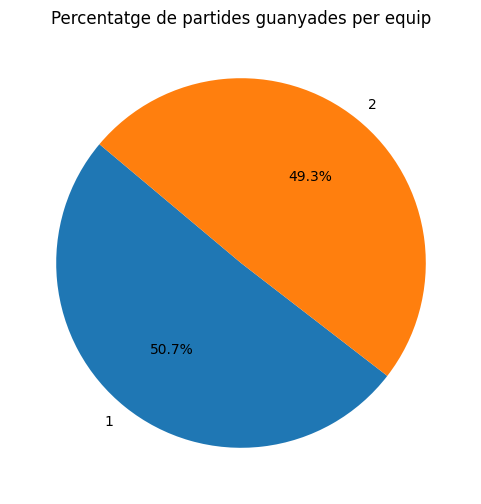

In [93]:
# Gràfic rodo de pastís del percentatge de partides guanyades per equip
import matplotlib.pyplot as plt
labels = winner_percentage.index
sizes = winner_percentage.values
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentatge de partides guanyades per equip')
plt.show()

#### First Kill
Ara mirarem quin dels dos equips en general ha tingut la primera port de cadascuna de les estructures.



In [80]:
# First kill 

first_blood_counts = DataSet_cleaned['firstBlood'].value_counts()
first_blood_percentage = (first_blood_counts / len(DataSet_cleaned) * 100).round(2)
print("Nombre de first blood per equip:")
print(first_blood_counts)
print("\nPercentatge de first blood per equip:")
print(first_blood_percentage)

first_tower_counts = DataSet_cleaned['firstTower'].value_counts()
first_tower_percentage = (first_tower_counts / len(DataSet_cleaned) * 100).round(2)
print("Nombre de first tower per equip:")
print(first_tower_counts)
print("\nPercentatge de first tower per equip:")
print(first_tower_percentage)

first_inhibitor_counts = DataSet_cleaned['firstInhibitor'].value_counts()
first_inhibitor_percentage = (first_inhibitor_counts / len(DataSet_cleaned) * 100).round(2)
print("Nombre de first inhibitor per equip:")
print(first_inhibitor_counts)
print("\nPercentatge de first inhibitor per equip:")
print(first_inhibitor_percentage)

first_baron_counts = DataSet_cleaned['firstBaron'].value_counts()
first_baron_percentage = (first_baron_counts / len(DataSet_cleaned) * 100).round(2)
print("Nombre de first baron per equip:")
print(first_baron_counts)
print("\nPercentatge de first baron per equip:")
print(first_baron_percentage)

first_dragon_counts = DataSet_cleaned['firstDragon'].value_counts()
first_dragon_percentage = (first_dragon_counts / len(DataSet_cleaned) * 100).round(2)
print("Nombre de first dragon per equip:")
print(first_dragon_counts)
print("\nPercentatge de first dragon per equip:")
print(first_dragon_percentage)

first_rift_herald_counts = DataSet_cleaned['firstRiftHerald'].value_counts()
first_rift_herald_percentage = (first_rift_herald_counts / len(DataSet_cleaned) * 100).round(2)
print("Nombre de first rift herald per equip:")
print(first_rift_herald_counts)
print("\nPercentatge de first rift herald per equip:")
print(first_rift_herald_percentage)

Nombre de first blood per equip:
firstBlood
1    25880
2    24619
0      554
Name: count, dtype: int64

Percentatge de first blood per equip:
firstBlood
1    50.69
2    48.22
0     1.09
Name: count, dtype: float64
Nombre de first tower per equip:
firstTower
1    25630
2    24218
0     1205
Name: count, dtype: int64

Percentatge de first tower per equip:
firstTower
1    50.20
2    47.44
0     2.36
Name: count, dtype: float64
Nombre de first inhibitor per equip:
firstInhibitor
1    22851
2    21976
0     6226
Name: count, dtype: int64

Percentatge de first inhibitor per equip:
firstInhibitor
1    44.76
2    43.05
0    12.20
Name: count, dtype: float64
Nombre de first baron per equip:
firstBaron
0    20091
2    16331
1    14631
Name: count, dtype: int64

Percentatge de first baron per equip:
firstBaron
0    39.35
2    31.99
1    28.66
Name: count, dtype: float64
Nombre de first dragon per equip:
firstDragon
2    24605
1    24466
0     1982
Name: count, dtype: int64

Percentatge de first d

#### Campions de les partides

##### 1. Mirar quants jugadors diferents hi ha i mirar ha que tendeixen a jugar, a l'equip 1 o 2

In [64]:
# Comptabilitzar quants jugadors diferents hi ha i mirar ha que tendeixen a jugar, a l'equip 1 o 2

all_players = pd.concat([
    # Equip 1
    DataSet_cleaned['t1_champ1id'], DataSet_cleaned['t1_champ2id'], DataSet_cleaned['t1_champ3id'],
    DataSet_cleaned['t1_champ4id'], DataSet_cleaned['t1_champ5id'],
    # Equip 2
    DataSet_cleaned['t2_champ1id'], DataSet_cleaned['t2_champ2id'], DataSet_cleaned['t2_champ3id'],
    DataSet_cleaned['t2_champ4id'], DataSet_cleaned['t2_champ5id']
])      

unique_players = all_players.unique()
print(f"Nombre de campions diferents: {len(unique_players)}")

Nombre de campions diferents: 138


In [75]:
t1_count = {player: 0 for player in unique_players}
t2_count = {player: 0 for player in unique_players}

t1_count = {player: 0 for player in unique_players}
t2_count = {player: 0 for player in unique_players}

for player in unique_players:
    t1_count[player] = (
        (DataSet_cleaned['t1_champ1id'] == player).sum() +
        (DataSet_cleaned['t1_champ2id'] == player).sum() +
        (DataSet_cleaned['t1_champ3id'] == player).sum() +
        (DataSet_cleaned['t1_champ4id'] == player).sum() +
        (DataSet_cleaned['t1_champ5id'] == player).sum()
    )
    t2_count[player] = (
        (DataSet_cleaned['t2_champ1id'] == player).sum() +
        (DataSet_cleaned['t2_champ2id'] == player).sum() +
        (DataSet_cleaned['t2_champ3id'] == player).sum() +
        (DataSet_cleaned['t2_champ4id'] == player).sum() +
        (DataSet_cleaned['t2_champ5id'] == player).sum()
    )

    print(f"Campió ID {player}: Equip 1 - {t1_count[player]} vegades, Equip 2 - {t2_count[player]} vegades")


Campió ID 8: Equip 1 - 1577 vegades, Equip 2 - 1594 vegades
Campió ID 119: Equip 1 - 2542 vegades, Equip 2 - 2506 vegades
Campió ID 18: Equip 1 - 6428 vegades, Equip 2 - 6457 vegades
Campió ID 57: Equip 1 - 2110 vegades, Equip 2 - 2157 vegades
Campió ID 19: Equip 1 - 2858 vegades, Equip 2 - 2957 vegades
Campió ID 40: Equip 1 - 4518 vegades, Equip 2 - 4099 vegades
Campió ID 74: Equip 1 - 850 vegades, Equip 2 - 813 vegades
Campió ID 150: Equip 1 - 1918 vegades, Equip 2 - 1973 vegades
Campió ID 111: Equip 1 - 1058 vegades, Equip 2 - 1029 vegades
Campió ID 427: Equip 1 - 538 vegades, Equip 2 - 528 vegades
Campió ID 99: Equip 1 - 3564 vegades, Equip 2 - 3580 vegades
Campió ID 22: Equip 1 - 2775 vegades, Equip 2 - 2580 vegades
Campió ID 79: Equip 1 - 3148 vegades, Equip 2 - 3221 vegades
Campió ID 143: Equip 1 - 1145 vegades, Equip 2 - 1192 vegades
Campió ID 23: Equip 1 - 2033 vegades, Equip 2 - 2022 vegades
Campió ID 67: Equip 1 - 5259 vegades, Equip 2 - 5302 vegades
Campió ID 114: Equip 1 -

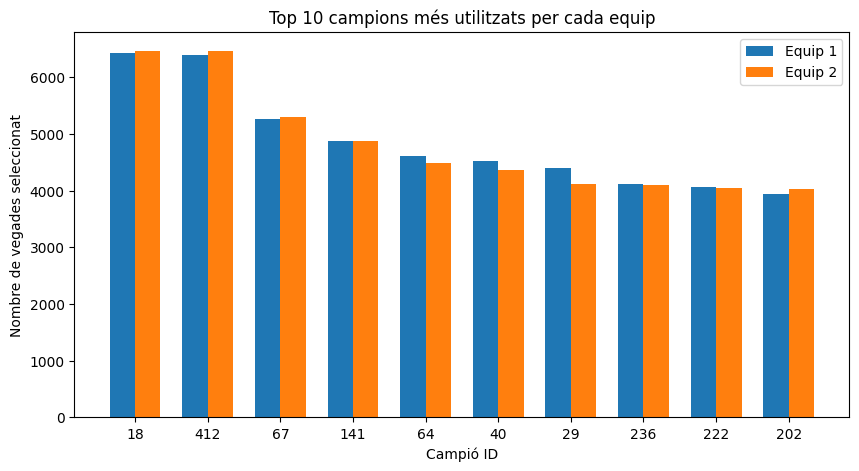

In [92]:
# Gràfic top 10 campions més utilitzats per cada equip

t1_count_series = pd.Series(t1_count)
t2_count_series = pd.Series(t2_count)
top_10_t1 = t1_count_series.sort_values(ascending=False).head(10)
top_10_t2 = t2_count_series.sort_values(ascending=False).head(10)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
bar_width = 0.35
index = np.arange(10)
plt.bar(index, top_10_t1.values, bar_width, label='Equip 1', color='#1f77b4')
plt.bar(index + bar_width, top_10_t2.values, bar_width, label='Equip 2', color='#ff7f0e')
plt.xlabel('Campió ID')
plt.ylabel('Nombre de vegades seleccionat')
plt.title('Top 10 campions més utilitzats per cada equip')
plt.xticks(index + bar_width / 2, top_10_t1.index)
plt.legend()
plt.show()

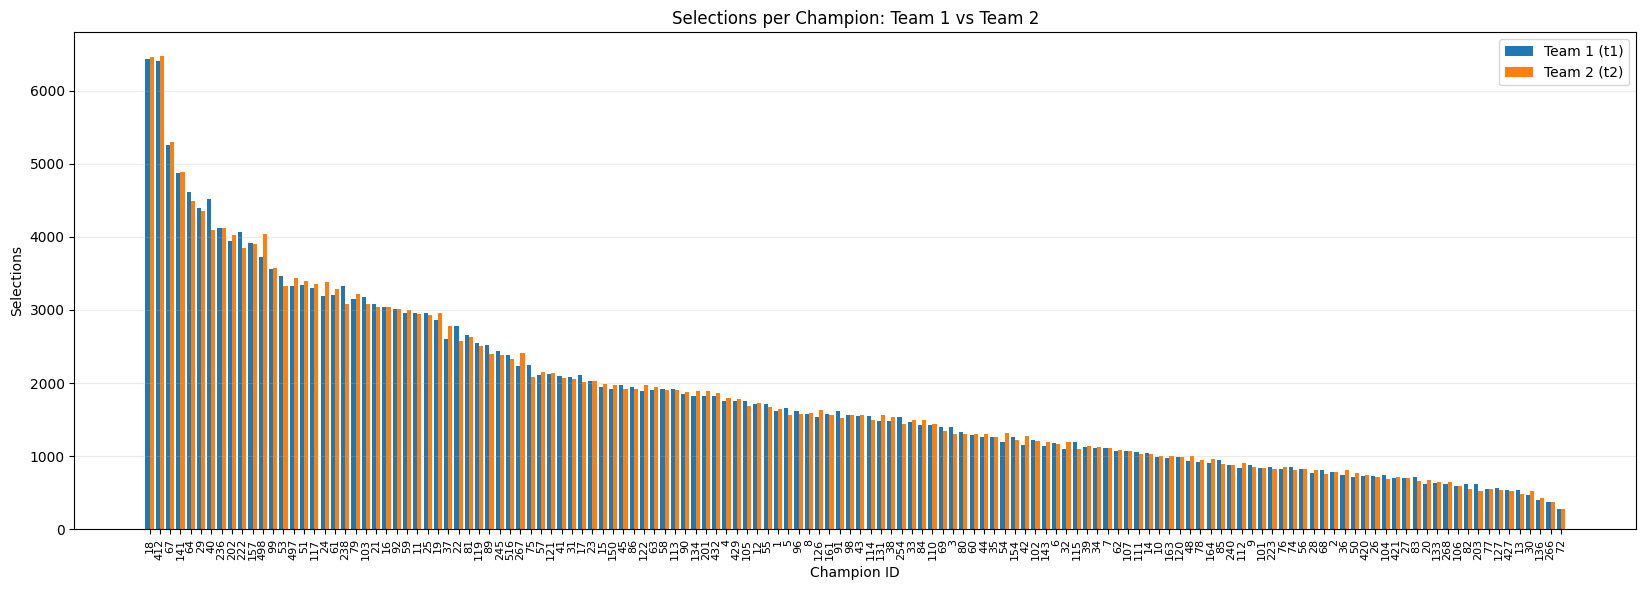

In [ ]:

# Preparar dades
champions = list(unique_players)
t1_vals = [t1_count.get(ch, 0) for ch in champions]
t2_vals = [t2_count.get(ch, 0) for ch in champions]

counts = pd.DataFrame({'t1': t1_vals, 't2': t2_vals}, index=champions)
counts['total'] = counts.sum(axis=1)
# Ordenar per total per mostrar primers els més seleccionats
counts = counts.sort_values('total', ascending=False)
counts_plot = counts[['t1', 't2']]

# Plotejar barres agrupades (doble color per campió)
pos = np.arange(len(counts_plot))
width = 0.4

import matplotlib.pyplot as plt
plt.figure(figsize=(max(12, len(counts_plot) * 0.12), 6))
plt.bar(pos - width/2, counts_plot['t1'], width, label='Team 1 (t1)', color='#1f77b4')
plt.bar(pos + width/2, counts_plot['t2'], width, label='Team 2 (t2)', color='#ff7f0e')

plt.xticks(pos, counts_plot.index.astype(str), rotation=90, fontsize=8)
plt.xlabel('Champion ID')
plt.ylabel('Selections')
plt.title('Selections per Champion: Team 1 vs Team 2')
plt.legend()
plt.grid(axis='y', alpha=0.25)
plt.tight_layout()
plt.show()

Pel que veig, la quantitat de vegades que és juga el campió entre els dos equips està bastant equilibrat, només que alguns campions són més útilitzats que d'altres.

#### T1 i T2
1. Encantaments més utilitzats com a primera i segona elecció, i combinació dels dos
2. Recompte de cadascun dels tipus de kills
3. Recompte de campions prohibits.


In [ ]:
from collections import defaultdict

# Encantaments més utilitzats com a primera i segona elecció, i combinació dels dos
def aggregate_team_sums(df, team_prefix, sum_suffix):
    pairs = []
    for i in range(1,6):
        champ_col = f"{team_prefix}_champ{i}id"
        sum_col = f"{team_prefix}_champ{i}_{sum_suffix}"
        if champ_col in df.columns and sum_col in df.columns:
            tmp = df[[champ_col, sum_col]].rename(columns={champ_col: "champ", sum_col: "sum"})
            pairs.append(tmp)
    if not pairs:
        return pd.DataFrame(columns=["encantament", "count", "champs"])
    all_pairs = pd.concat(pairs, ignore_index=True)
    # comptatges i llista única de campions per encantament
    counts = all_pairs["sum"].value_counts().sort_index()
    champs_per = all_pairs.groupby("sum")["champ"].unique().apply(list)
    result = pd.DataFrame({
        "encantament": counts.index,
        "count": counts.values,
        "champs": champs_per.reindex(counts.index).values
    })
    result = result.reset_index(drop=True)
    return result

# Agregacions per equip i per primer/segon encantament
t1_sum1_df = aggregate_team_sums(DataSet_cleaned, "t1", "sum1")
t1_sum2_df = aggregate_team_sums(DataSet_cleaned, "t1", "sum2")
t2_sum1_df = aggregate_team_sums(DataSet_cleaned, "t2", "sum1")
t2_sum2_df = aggregate_team_sums(DataSet_cleaned, "t2", "sum2")

# Mostrar resultats (mostrem totes les files; ajustar .head() si cal)
print("Team 1 - Primer encantament (sum1):")
print(t1_sum1_df)
print("\nTeam 1 - Segon encantament (sum2):")
print(t1_sum2_df)
print("\nTeam 2 - Primer encantament (sum1):")
print(t2_sum1_df)
print("\nTeam 2 - Segon encantament (sum2):")
print(t2_sum2_df) 

Team 1 - Primer encantament (sum1):
   encantament   count                                             champs
0            1     694  [61, 101, 157, 4, 112, 34, 202, 13, 69, 245, 1...
1            3   19038  [40, 74, 143, 25, 43, 8, 117, 432, 497, 37, 53...
2            4  138921  [18, 57, 19, 427, 99, 79, 40, 67, 114, 421, 13...
3            6    3420  [11, 103, 69, 61, 4, 27, 19, 17, 2, 90, 120, 1...
4            7   23688  [119, 22, 222, 18, 21, 81, 29, 69, 236, 498, 6...
5           11   23553  [35, 24, 74, 141, 106, 254, 131, 48, 31, 19, 9...
6           12   23754  [8, 150, 111, 23, 122, 78, 24, 126, 10, 75, 59...
7           14   18969  [35, 99, 240, 27, 105, 157, 497, 103, 90, 1, 4...
8           21    3228  [69, 4, 101, 115, 63, 99, 61, 3, 18, 161, 112,...

Team 1 - Segon encantament (sum2):
   encantament   count                                             champs
0            1     827  [112, 498, 69, 99, 101, 61, 134, 103, 161, 429...
1            3   22859  [427, 40, 134, 4

In [82]:
# Cadascun dels equips mirar el nombre de kills per tipus i el recompte de campions prohibits

# Equip 1 
tower_kills_t1 = DataSet_cleaned['t1_towerKills'].sum()
inhibitor_kills_t1 = DataSet_cleaned['t1_inhibitorKills'].sum()
baron_kills_t1 = DataSet_cleaned['t1_baronKills'].sum()
dragon_kills_t1 = DataSet_cleaned['t1_dragonKills'].sum()
rift_herald_kills_t1 = DataSet_cleaned['t1_riftHeraldKills'].sum()

# Equip 2
tower_kills_t2 = DataSet_cleaned['t2_towerKills'].sum()
inhibitor_kills_t2 = DataSet_cleaned['t2_inhibitorKills'].sum()
baron_kills_t2 = DataSet_cleaned['t2_baronKills'].sum()
dragon_kills_t2 = DataSet_cleaned['t2_dragonKills'].sum()
rift_herald_kills_t2 = DataSet_cleaned['t2_riftHeraldKills'].sum()

print("Equip 1 - Recompte de kills per tipus:")
print(f"Torres destruïdes: {tower_kills_t1}")
print(f"Inhibidors destruïts: {inhibitor_kills_t1}")
print(f"Barons Nashor assassinats: {baron_kills_t1}")
print(f"Dracs assassinats: {dragon_kills_t1}")
print(f"Rift Heralds assassinats: {rift_herald_kills_t1}")

print("\nEquip 2 - Recompte de kills per tipus:")
print(f"Torres destruïdes: {tower_kills_t2}")
print(f"Inhibidors destruïts: {inhibitor_kills_t2}")
print(f"Barons Nashor assassinats: {baron_kills_t2}")
print(f"Dracs assassinats: {dragon_kills_t2}")
print(f"Rift Heralds assassinats: {rift_herald_kills_t2}")


Equip 1 - Recompte de kills per tipus:
Torres destruïdes: 290917
Inhibidors destruïts: 51956
Barons Nashor assassinats: 19009
Dracs assassinats: 70792
Rift Heralds assassinats: 12833

Equip 2 - Recompte de kills per tipus:
Torres destruïdes: 283315
Inhibidors destruïts: 50294
Barons Nashor assassinats: 21157
Dracs assassinats: 71717
Rift Heralds assassinats: 12265


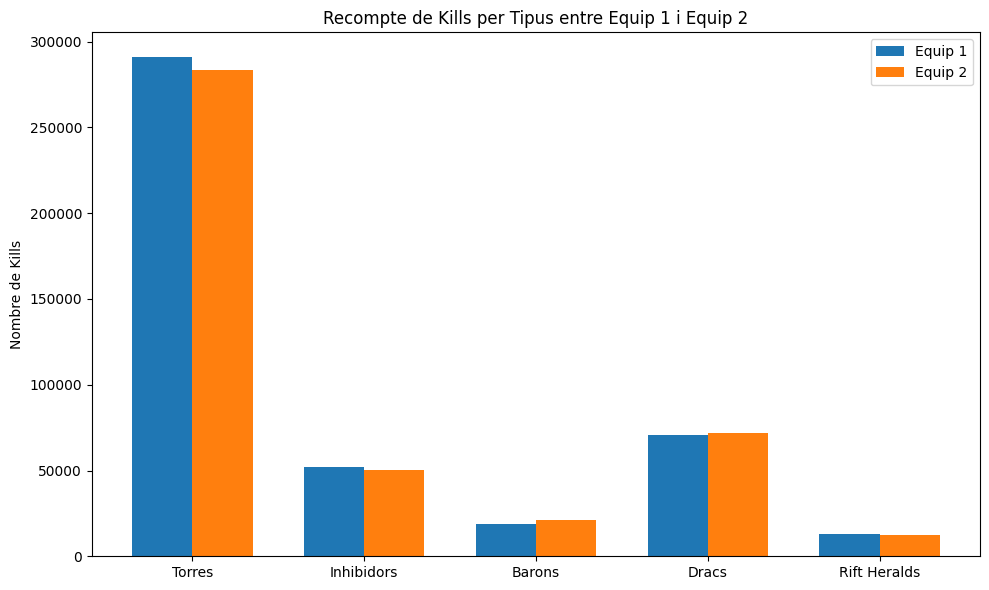

In [91]:
# Gràfic comparatiu de kills per tipus entre equips
import matplotlib.pyplot as plt
labels = ['Torres', 'Inhibidors', 'Barons', 'Dracs', 'Rift Heralds']
t1_kills = [tower_kills_t1, inhibitor_kills_t1, baron_kills_t1, dragon_kills_t1, rift_herald_kills_t1]
t2_kills = [tower_kills_t2, inhibitor_kills_t2, baron_kills_t2, dragon_kills_t2, rift_herald_kills_t2]  

x = np.arange(len(labels))  # la posició de les etiquetes
width = 0.35  # l'amplada de les barres
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, t1_kills, width, label='Equip 1', color='#1f77b4')
rects2 = ax.bar(x + width/2, t2_kills, width, label='Equip 2', color='#ff7f0e')
ax.set_ylabel('Nombre de Kills')
ax.set_title('Recompte de Kills per Tipus entre Equip 1 i Equip 2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

In [84]:
# Campions prohibits

# Equip 1

banned_champions_t1 = pd.concat([
    DataSet_cleaned['t1_ban1'], DataSet_cleaned['t1_ban2'], DataSet_cleaned['t1_ban3'],
    DataSet_cleaned['t1_ban4'], DataSet_cleaned['t1_ban5']
])


# Equip 2
banned_champions_t2 = pd.concat([
    DataSet_cleaned['t2_ban1'], DataSet_cleaned['t2_ban2'], DataSet_cleaned['t2_ban3'],
    DataSet_cleaned['t2_ban4'], DataSet_cleaned['t2_ban5']
])

banned_champions_t1_counts = banned_champions_t1.value_counts()
banned_champions_t2_counts = banned_champions_t2.value_counts()

print("Equip 1 - Campions prohibits i recompte:")
print(banned_champions_t1_counts)
print("\nEquip 2 - Campions prohibits i recompte:")
print(banned_champions_t2_counts)

# General 
total_banned_champions = pd.concat([banned_champions_t1, banned_champions_t2])
total_banned_champions_counts = total_banned_champions.value_counts()

print("\nGeneral - Campions prohibits i recompte:")
print(total_banned_champions_counts)

Equip 1 - Campions prohibits i recompte:
157    16493
238    12660
31     12356
122    11523
40     10151
       ...  
30        59
14        47
77        44
13        42
72        32
Name: count, Length: 139, dtype: int64

Equip 2 - Campions prohibits i recompte:
157    16274
31     12580
238    12536
122    11142
40     11018
       ...  
30        69
112       64
13        52
77        46
72        38
Name: count, Length: 139, dtype: int64

General - Campions prohibits i recompte:
157    32767
238    25196
31     24936
122    22665
40     21169
       ...  
30       128
14       116
13        94
77        90
72        70
Name: count, Length: 139, dtype: int64


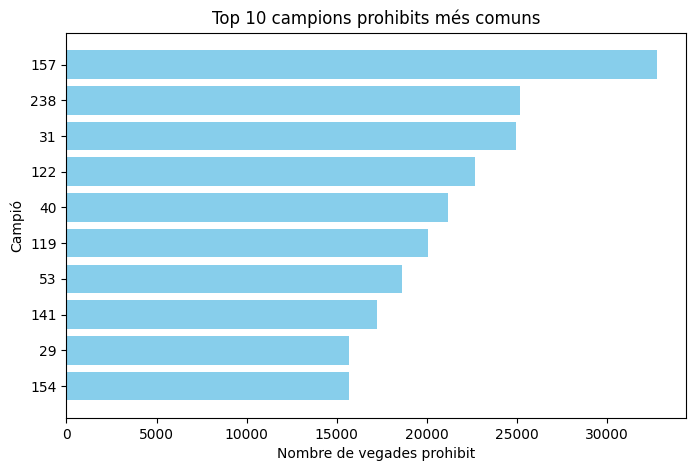

In [90]:
# Grafic de barres horitzontals dels campions prohibits més comuns
import matplotlib.pyplot as plt
top_n = 10
top_banned = total_banned_champions_counts.head(top_n)

plt.figure(figsize=(8, 5))
plt.barh(top_banned.index.astype(str), top_banned.values, color='skyblue')
plt.xlabel('Nombre de vegades prohibit')
plt.ylabel('Campió')
plt.title('Top 10 campions prohibits més comuns')
plt.gca().invert_yaxis()  # Invertir l'eix y per mostrar el campió més prohibit a dalt
plt.show()